*Щелканов А. КЭ-402*

# Задание

Разработайте программу, которая выполняет поиск частых наборов объектов в заданном наборе данных с помощью алгоритма Apriori (или одной из его модификаций). Список результирующих наборов должен содержать как наборы, так и значение поддержки для каждого набора. Параметрами программы являются набор, порог поддержки и способ упорядочивания результирующего списка наборов (по убыванию значения поддержки или лексикографическое).

Проведите эксперименты на наборе данных baskets.csv (сведения о покупках в супермаркете). В экспериментах варьируйте пороговое значение поддержки (например: 1%, 3%, 5%, 10%, 15%).

Выполните визуализацию результатов экспериментов в виде следующих диаграмм:
- сравнение быстродействия на фиксированном наборе данных при изменяемом пороге поддержки;
- количество частых наборов объектов различной длины на фиксированном наборе данных при изменяемом пороге поддержки.

# Решение

**Загрузка данных**

In [6]:
import pandas as pd

# загружаем данные из csv файла с покупками
df = pd.read_csv("/content/baskets.csv", encoding='windows-1251')
df

,креветки,миндаль,авокадо,овощная смесь,зеленый виноград,цельнозерновая мука,батат,творог,энергетический напиток,томатный сок,низкокалорийный йогурт,зеленый чай,мед,салат,минеральная вода,лосось,ягодный сок,замороженный смузи,шпинат,оливковое масло
0,гамбургер,фрикадельки,яйца,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,чатни,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,индейка,авокадо,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,минеральная вода,молоко,энергетический батончик,рис,зеленый чай,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,низкокалорийный йогурт,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,сливочное масло,низкокалорийный майонез,свежий хлеб,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7496,гамбургер,замороженные овощи,яйца,картофель-фри,журнал,зеленый чай,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,курица,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,эскалоп,зеленый чай,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Преобразуем DataFrame в список транзакций, кодируем их в бинарную матрицу с помощью TransactionEncoder и создаем новый DataFrame с закодированными данными

In [15]:
from mlxtend.preprocessing import TransactionEncoder

# преобразуем данные в формат транзакций (списки покупок)
transactions = df.apply(lambda x: x.dropna().tolist(), axis=1).tolist()

# создаём объект для кодирования транзакций
te = TransactionEncoder()

# применяем трансформацию для преобразования транзакций в формат матрицы
te_ary = te.fit(transactions).transform(transactions)

df_encoded = pd.DataFrame(te_ary, columns=te.columns_) # результат кодирования
df_encoded

,авокадо,аксессуары,баклажаны,батат,батончик без глютена,бекон,белое вино,белый сыр,блинчики,ветчина,...,чили,шампанское,шампунь,шоколад,шпинат,энергетический батончик,энергетический напиток,эскалоп,ягодный сок,яйца
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


Запускаем алгоритм Apriori с разными порогами минимальной поддержки, измеряем время выполнения и собираем статистику по количеству найденных частых наборов элементов.
- поддержка -- доля транзакцийЮ содержащих данный набор элементов
- частые наборы -- группы элементов, которые часто встречаются вместе в транзакциях
- алгоритм Apriori определяет частые наборы, начиная с одиночных элементов и постепенно объединяет из в большие группы, отбрасывая редкие комбинации на каждом шаге

In [39]:
import time
from mlxtend.frequent_patterns import apriori

support_thresholds = [0.01, 0.03, 0.05, 0.1, 0.15] # пороги поддержки
results = [] # список результатов

# проходим по каждому порогу поддержки
for min_support in support_thresholds:
    start_time = time.time() # время начала выполнения

    # Apriori с текущим порогом поддержки
    frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

    execution_time = time.time() - start_time # время выполнения

    itemset_lengths = frequent_itemsets['itemsets'].apply(len) # длина каждого набора

    # статистика для текущего порога
    stats = {
        'min_support': min_support,
        'time': execution_time,
        'total_itemsets': len(frequent_itemsets),
        'length_counts': itemset_lengths.value_counts().to_dict(),
        'frequent_itemsets': frequent_itemsets
    }
    results.append(stats)

     # информация по текущему порогу
    print(f"\nПорог поддержки: {min_support}")
    print(f"Время выполнения: {execution_time:.4f} сек")
    print(f"Общее количество наборов: {len(frequent_itemsets)}")

    # топ-3 наборов длиной от 1 до 3
    for length in range(1, 4):
        print(f"\nТоп-3 наборов длины {length} по поддержке:")

        filtered_itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == length)] # фильтр по длине

        if filtered_itemsets.empty:
            print("Отсутствуют")
        else:
            filtered_itemsets = filtered_itemsets.sort_values(by='support', ascending=False) # сортировка по поддержке
            top_3 = filtered_itemsets.head(3)
            print(top_3[['itemsets', 'support']])

    print("-" * 40)



Порог поддержки: 0.01
Время выполнения: 0.1613 сек
Общее количество наборов: 263

Топ-3 наборов длины 1 по поддержке:
              itemsets   support
31  (минеральная вода)  0.238267
26          (макароны)  0.188000
73              (яйца)  0.179733

Топ-3 наборов длины 2 по поддержке:
                         itemsets   support
185  (макароны, минеральная вода)  0.061200
213   (минеральная вода, шоколад)  0.052667
215      (минеральная вода, яйца)  0.050933

Топ-3 наборов длины 3 по поддержке:
                                       itemsets   support
247  (макароны, минеральная вода, говяжий фарш)  0.017200
256       (макароны, минеральная вода, шоколад)  0.016400
254        (макароны, минеральная вода, молоко)  0.016133
----------------------------------------

Порог поддержки: 0.03
Время выполнения: 0.0244 сек
Общее количество наборов: 55

Топ-3 наборов длины 1 по поддержке:
              itemsets   support
14  (минеральная вода)  0.238267
12          (макароны)  0.188000
35       

Строим график зависимости времени выполнения алгоритма Apriori от порога минимальной поддержки (min_support).

- при **низком значении min_support** алгоритм находит множество частых наборов, что увеличивает вычислительную нагрузку и время выполнения

- при **увеличении min_support** количество частых наборов сокращается, что снижает сложность поиска ускоряет выполнение

*При высоких значениях min_support редкие элементы отбрасываются на ранних этапах, что ускрояет процесс*

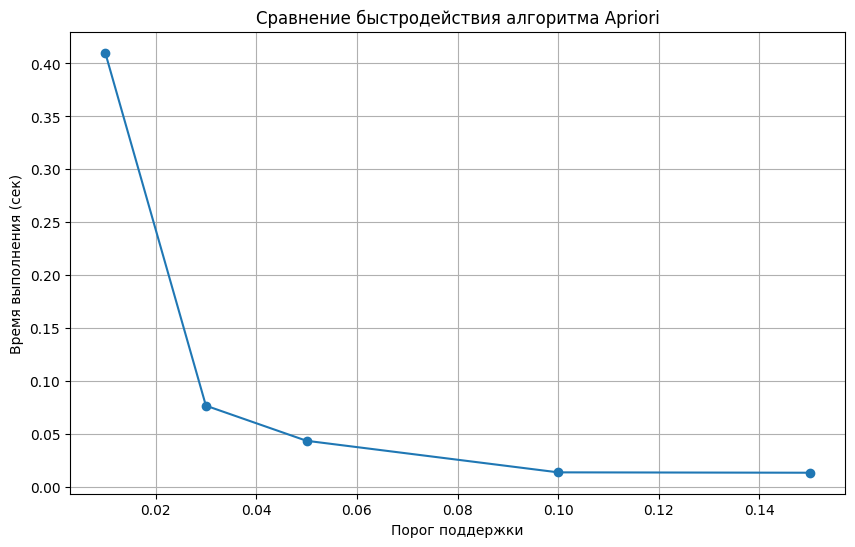

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot([res['min_support'] for res in results], [res['time'] for res in results], marker='o')
plt.xlabel('Порог поддержки')
plt.ylabel('Время выполнения (сек)')
plt.title('Сравнение быстродействия алгоритма Apriori')
plt.grid(True)
plt.show()

Строим график распределения частых наборов по их длине и порогу поддержки.

С повышением min_support количество частых наборов уменьшается, особенно для длинных наборов

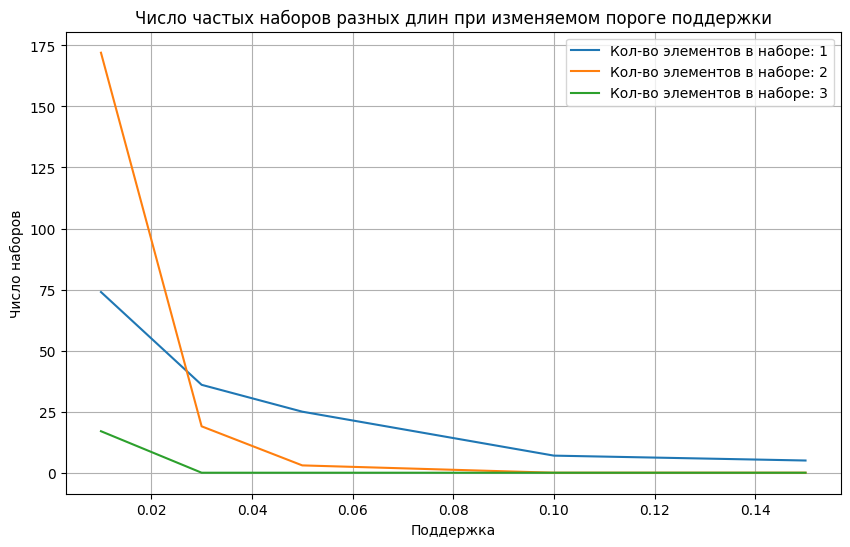

In [38]:
number_of_items_by_length = {} #словарь количества наборов по длинам
supports = [res['min_support'] for res in results]

all_lengths = set() # все длины наборов

# обновляем множество длин наборов для каждого порога поддержки
for res in results:
    all_lengths.update(res['length_counts'].keys())

# добавляем в словарь пустые списки для каждой длины набора
for length in all_lengths:
    number_of_items_by_length[length] = [0] * len(supports)

# для каждого результата заполняем количество наборов по длине для каждого порога
for i, res in enumerate(results):
    for length, count in res['length_counts'].items():
        number_of_items_by_length[length][i] = count

plt.figure(figsize=(10, 6))

# для каждой длины набора строим график с количеством наборов
for length, counts in sorted(number_of_items_by_length.items()):
    plt.plot(supports, counts, label=f'Кол-во элементов в наборе: {length}')

plt.xlabel('Поддержка')
plt.ylabel('Число наборов')
plt.title('Число частых наборов разных длин при изменяемом пороге поддержки')
plt.legend()
plt.grid(True)
plt.show()


Сортировка частых наборов по убыванию поддержки

In [37]:
for res in results:
    print(f"Порог: {res['min_support']}")
    print(f"Время: {res['time']:.2f} сек")
    print(f"Всего наборов: {res['total_itemsets']}")
    print(f"Распределение по длинам: {res['length_counts']}\n")

Порог: 0.01
Время: 0.27 сек
Всего наборов: 263
Распределение по длинам: {2: 172, 1: 74, 3: 17}

Порог: 0.03
Время: 0.04 сек
Всего наборов: 55
Распределение по длинам: {1: 36, 2: 19}

Порог: 0.05
Время: 0.02 сек
Всего наборов: 28
Распределение по длинам: {1: 25, 2: 3}

Порог: 0.1
Время: 0.01 сек
Всего наборов: 7
Распределение по длинам: {1: 7}

Порог: 0.15
Время: 0.01 сек
Всего наборов: 5
Распределение по длинам: {1: 5}

